# SVM Classification

## Linear Support Vector Machines
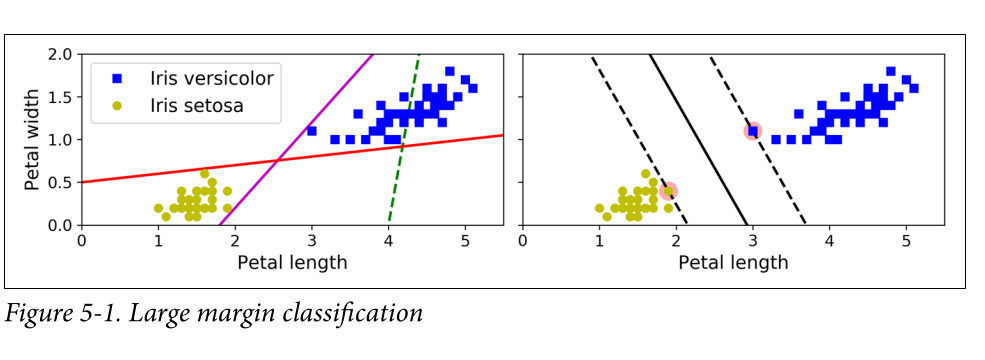

The figure on the left shows a few possible decision boundaries determined by linear classifiers, while the figure on the right shows the decision boundary of a SVM. The straight line in the middle is the decision boundary of the SVM, while the dashed lines are touching the support vectors (the two instances of both classes that are closest to the decision boundary) and are parallel to the decision boundary. The goal of the SVM is find a decision boundary such that the distance between the support vectors and the boundary is maximum.

__Notes:__ 
* Adding more instances in the middle of the two clusters will not affect the decision boundary since the decision boundary is only affected if there is a change to the support vectors. 
* Support Vector Machines are sensitive to unscaled data, so make sure to scale your data using something like the standard scaler!

If we require that the decision boundary separates the two clusters, then this is called a _hard marign classifier_. This kind of classifier is sensitive to outliers and might not even be possible to create as shown in the following figure:
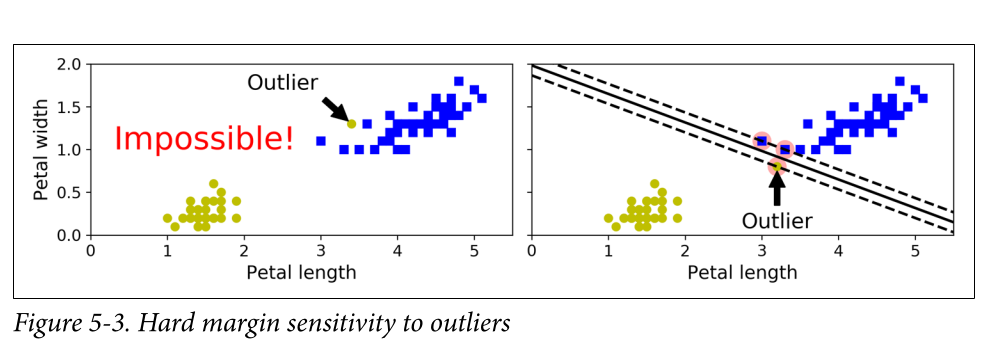

The solution to this problem is by using a more flexible model that is called a _soft margin classifier_. This classifier allows some instances to be between the decision boundary and the parallel dashed lines, or even be on the wrong side of the decision boundary. The goal here is to find balance between having a wide distance between support vectors, and having a small number of outliers allowed. 
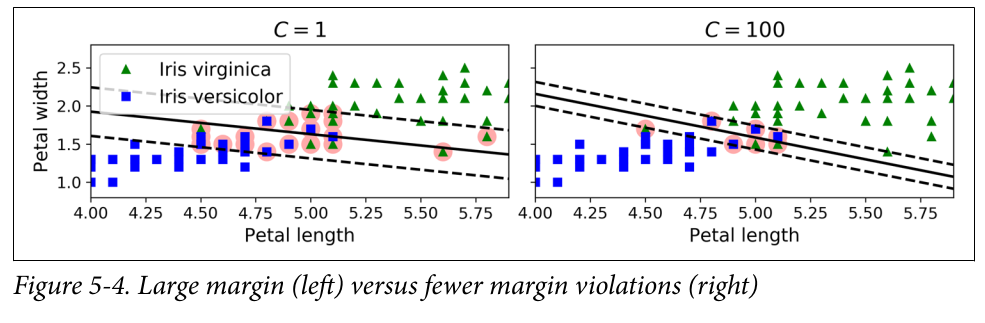

In [2]:
import numpy as np
from sklearn import datasets 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] #get the petal length, petal width
y = (iris['target'] == 2).astype(np.float64) #Iris virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
])
svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

__Notes:__
* Instead of using LinearSVC, we could use SVC with a linear kernel (SVC(kernel = 'linear', C = 1)), or we could use the SGDClassifier class, with SGDClassifier(loss = 'hinge', alpha = 1/(m*C)). This last one can be useful in out of core learning when the training data cannot fit into memory.
* LinearSVC regularizes the bias term, so we should center the data by subtracting its mean. This is done automatically if we scale the data using the StandardScaler. Additionally, set the loss hyperparameter to 'hinge' since it is not the default, and set the dual hyperparameter to False, unless there are more features than training instances.

## Nonlinear Support Vector Machines

### Polynomial Features
One approach to turn linear support vector machines into nonlinear ones is to add more features to the data, which could make the data linearaly separable. 

In [19]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [20]:
X, y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C = 10, loss = 'hinge'))
])

polynomial_svm_clf.fit(X, y)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

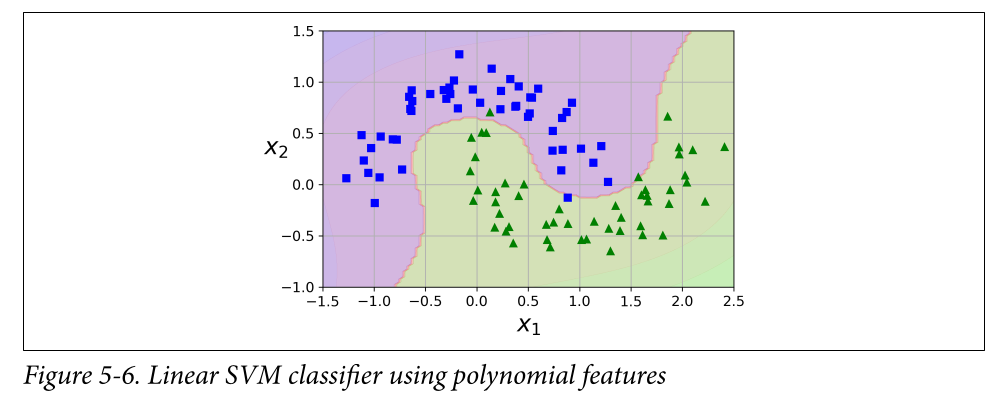

Adding polynomial features can be a simple trick that can work with any classifier, not just SVMs, but if you add a low degree polynomial, then you might not be able to deal with complex datasets, and if you add too high of a degree polynomial, then you create a huge number of features, making the model slow.
 
There is a solution to this problem called the _kernel trick_, which allows you to get the same result as if you had added many polynomial features without having to actually add them.

In [21]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0=1, C = 5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

The code above trains an SVM using a third-degree polynomial kernel. If you find that the model is overfitting, you can choose a smaller degree polynomial. If you find that it is underfitting, you can increase the polynomial degree. 

__Note:__ The hyperparameter coef0 controls how much the model is influenced by high-degree polynomials versus low-degree polynomials.

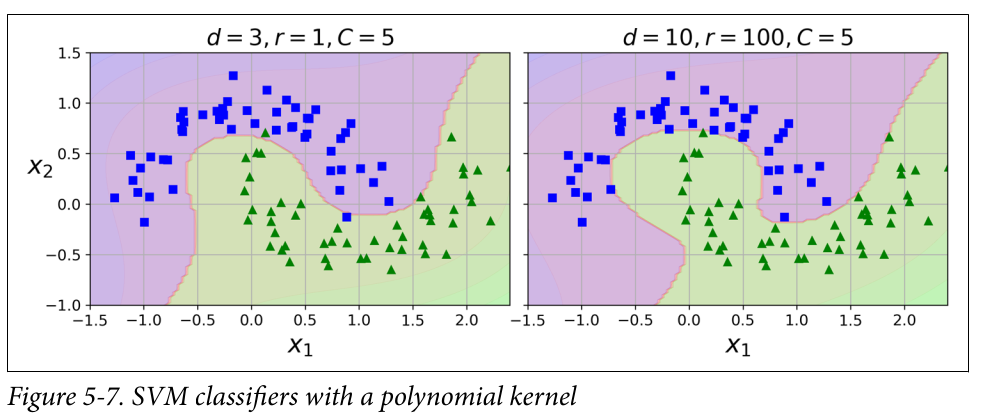

### Similarity features
Another technique to tackle nonlinear problems is by adding features computed using a similarity function.

This works like this:
1. Choose landmark points (You make every single instance in the dataset a landmark point).
2. Using a similarity function, calculate how similar each instance is to the landmarks you chose. These similarity values are the new features that you can use to train your model. The similarity function is: 

    $\phi_\gamma(x, \lambda) = exp(-\gamma (\begin{Vmatrix} x - \lambda\end{Vmatrix})^2)$
    
    This is known as the Gaussian Radial Basis Function

__Note:__ if you decide to make every instance in your training data a landmark, then you end up having as many features as training instances in the dataset (assuming you drop all the original features). This will make the training take longer.

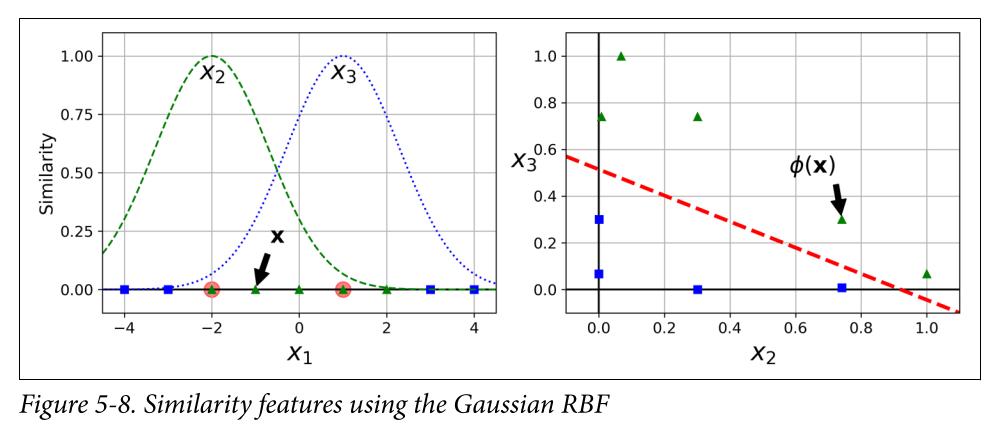

The gaussian RBF kernel can also using the kernel trick from the polynomial approach within sklearn as follows:


In [22]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

The parameter gamma $\gamma$ controls the width of the bell curve. Increasing gamma decreases the width of the bell curve, while decreasing gamma increases the width of the bell curve. A narrow bell curve means that the range of influence of each instance is smaller, which makes the decision boundary irregular. On the other hand, making gamma smaller makes the width of the bell curve higher and increases the range of influence of each instance, making the decision boundary smoother. 

__Note:__ based on the statement above, gamma should be reduced if the model is overfitting; if the model is underfitting, gamma should be increased. (Similar to the hyperparameter C).

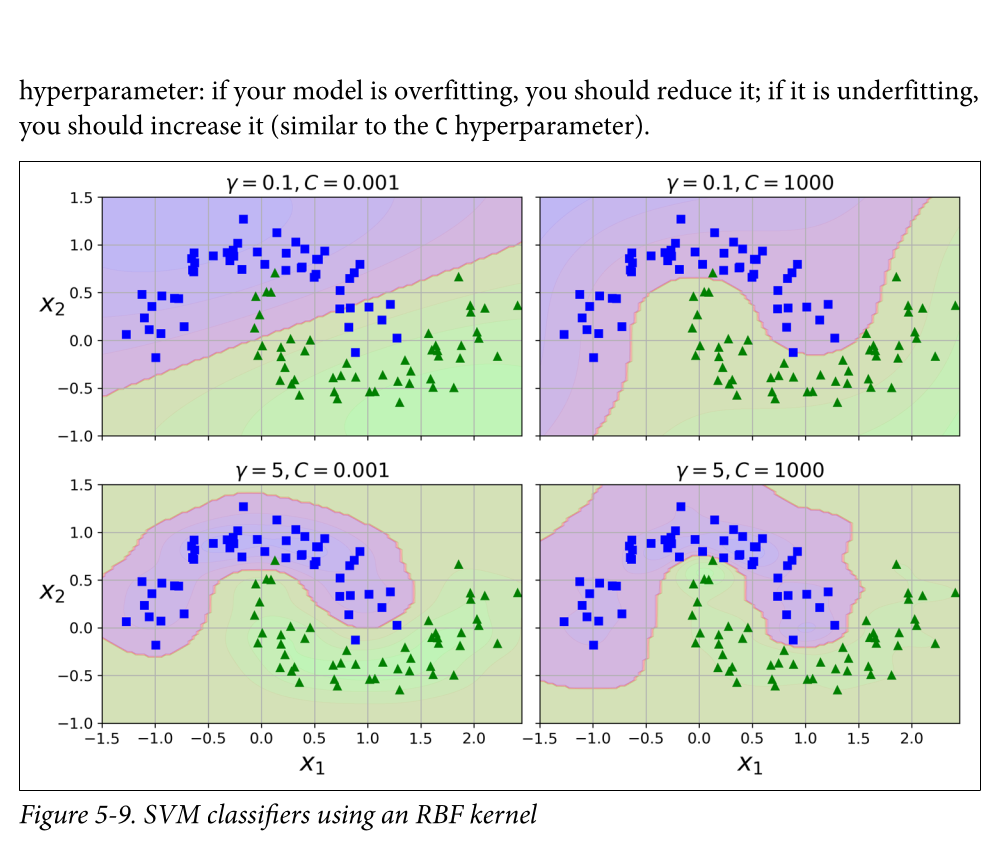

How to choose which kernel to use?
1. First try the LinearSVC, which is faster than SVC(kernel = 'linear')
2. If the training data is not too large, try the RBF kernel. 
3. Try other kernels using grid search to determine which one is the best.

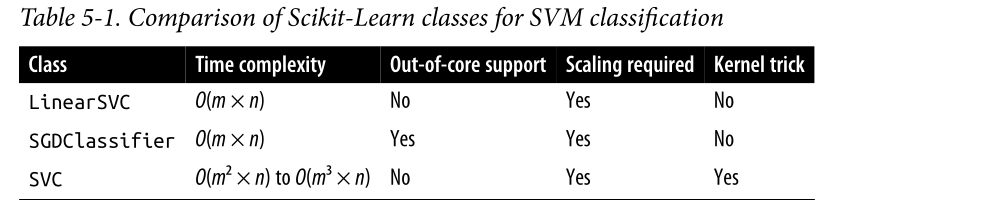

# SVM Regression

Using SVM for regression can be done by instead of trying to fit a decision boundary with as much distance between two classes as possible, we can try to fit a decision boundary that passes through as many instances as possible, and includes more instances within its margin. The margin (width) of the SVM is controller by a hyperparameter called $\epsilon$.

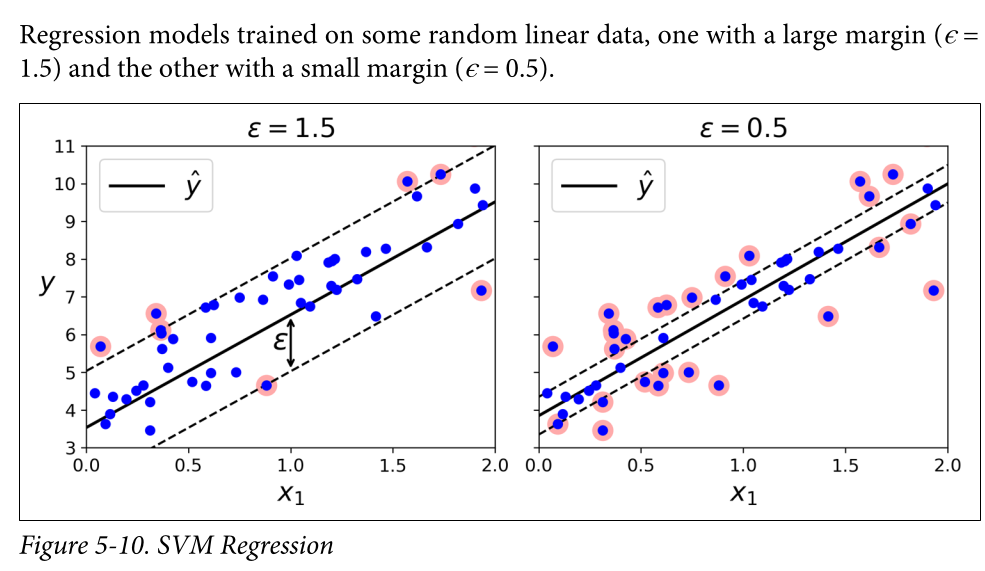

__Note:__ Adding more training instances within the margin does not affect the model's prediction; thus, the model is said to be $\epsilon$-_insensitive_.

The following code shows how to use it in sklearn:

In [24]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1.5)


In [25]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel = 'poly', degree = 2, epsilon = 0.1, C = 100)